In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min, expon, lognorm
from scipy.optimize import minimize
from reliability.Distributions import Weibull_Distribution, Lognormal_Distribution, Exponential_Distribution

In [2]:
# Define the mixture model
def mixture_model(x, w, params):
    return w[0] * weibull_min.pdf(x, c=params[1], scale=params[2]) + w[1] * expon.pdf(x, scale=params[0]) +  w[2] * lognorm.pdf(x, s=params[3], scale=params[4])


In [13]:
x = np.linspace(0, 1000, 1000)
w = [0.05, 0.05, 0.9]
parameters = [400, 0.7, 10000, 6.8, 0.1]

In [14]:
y_mix = mixture_model(x, w, parameters)

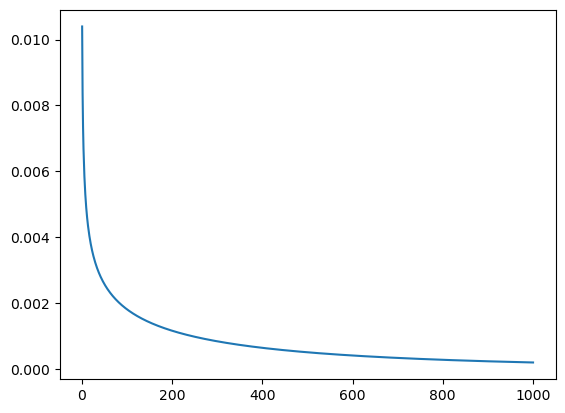

In [16]:
# Wiebull pdf 
def weibull_pdf(x, c, scale):
    return weibull_min.pdf(x, c=c, scale=scale)

# plot weibull pdf
def plot_weibull_pdf(c, scale):
    x = np.linspace(0, 1000, 1000)
    y = weibull_pdf(x, c, scale)
    plt.y_lim = (0, 1)
    plt.plot(x, y)
    plt.show()

plot_weibull_pdf(0.7, 400)

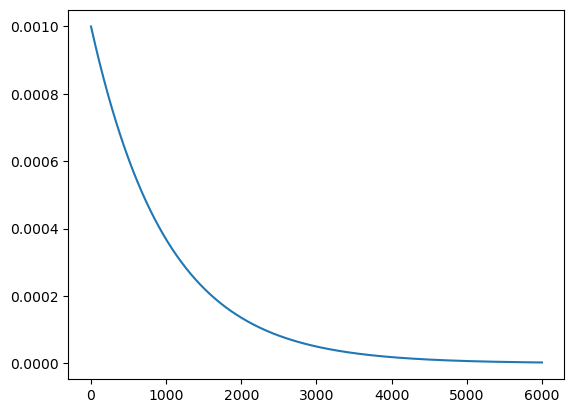

In [12]:
def expo_pdf(x, scale):
    return expon.pdf(x, scale=scale)

# plot exponential pdf
def plot_expo_pdf(scale):
    x = np.linspace(0, 6000, 6000)
    y = expo_pdf(x, scale)
    plt.plot(x, y)
    plt.show()

plot_expo_pdf(1000)

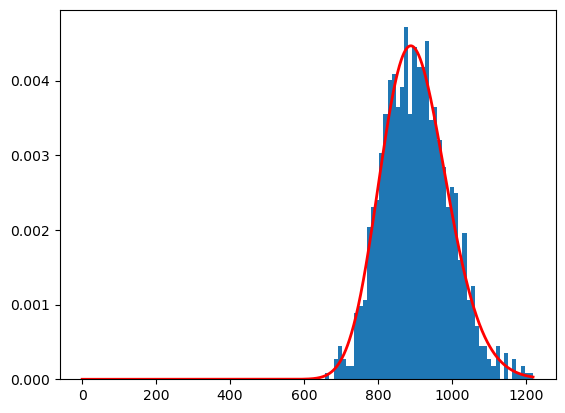

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Define the parameters for the lognormal distribution
mu, sigma = 6.8, 0.1

# Generate random variables from the lognormal distribution
x = lognorm.rvs(s=sigma, scale=np.exp(mu), size=1000)

# Plot the histogram of the generated data
plt.hist(x, bins=50, density=True)

# Plot the probability density function (pdf) of the lognormal distribution
x_axis = np.linspace(0, x.max(), 1000)
pdf = lognorm.pdf(x_axis, s=sigma, scale=np.exp(mu))
plt.plot(x_axis, pdf, 'r', lw=2)

plt.show()


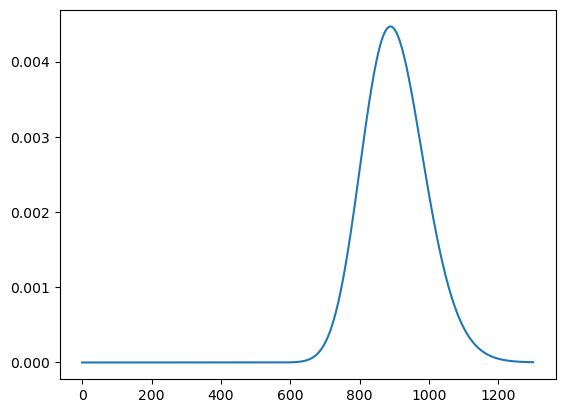

In [59]:
def lognorm_pdf(x, s, mu):
    return lognorm.pdf(x, s=s, scale=mu)

# plot lognormal pdf
def plot_lognorm_pdf(sig, mu):
    x = np.linspace(0, 1300, 1000)
    y = lognorm_pdf(x, s=sig, mu=np.exp(mu))
    plt.plot(x, y)
    plt.show()

plot_lognorm_pdf(sig=0.1, mu=6.8)

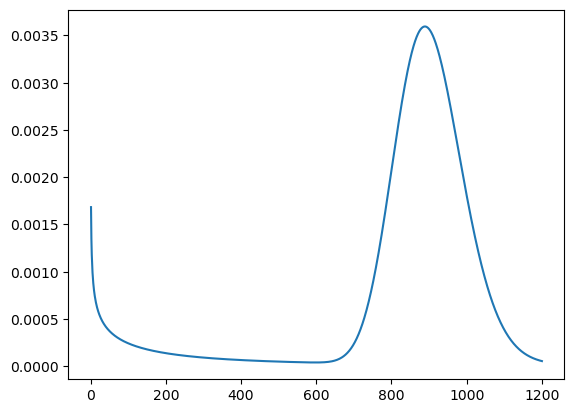

In [67]:
def weibull_expo_lognorm_pdf(x):
    return 0.1 * weibull_pdf(x, c=0.7, scale=200) + 0.1 * expo_pdf(x, scale=10000) + 0.8 * lognorm_pdf(x, s=0.1, mu=np.exp(6.8))

def plot_weibull_expo_pdf():
    x = np.linspace(0, 1200, 1200)
    y = weibull_expo_lognorm_pdf(x)
    plt.plot(x, y)
    plt.show()

plot_weibull_expo_pdf()

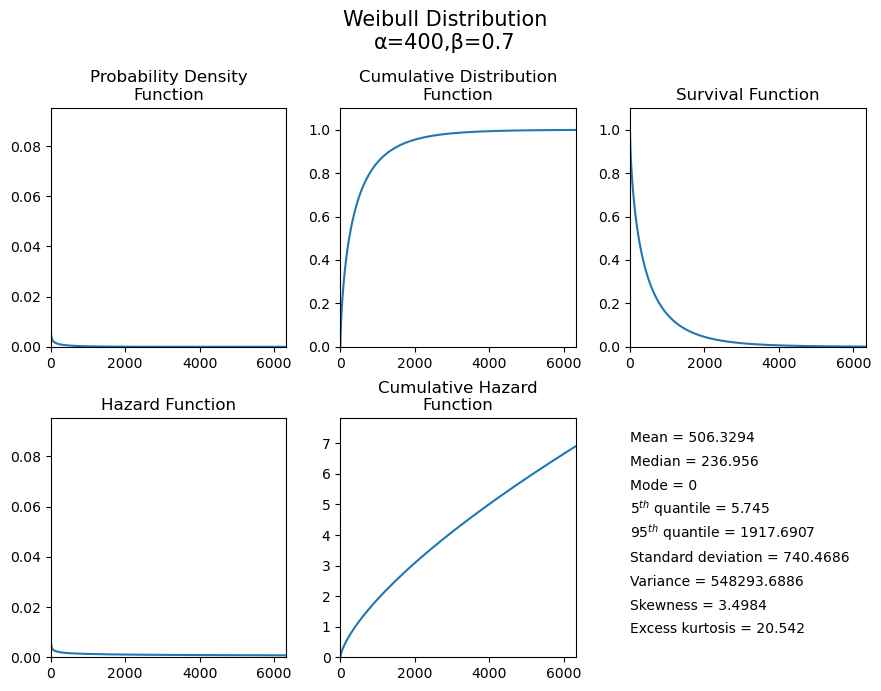

In [8]:

# xvals = np.linspace(0,1000,1000)
infant_mortality = Weibull_Distribution(alpha=400,beta=0.7)
infant_mortality.plot()

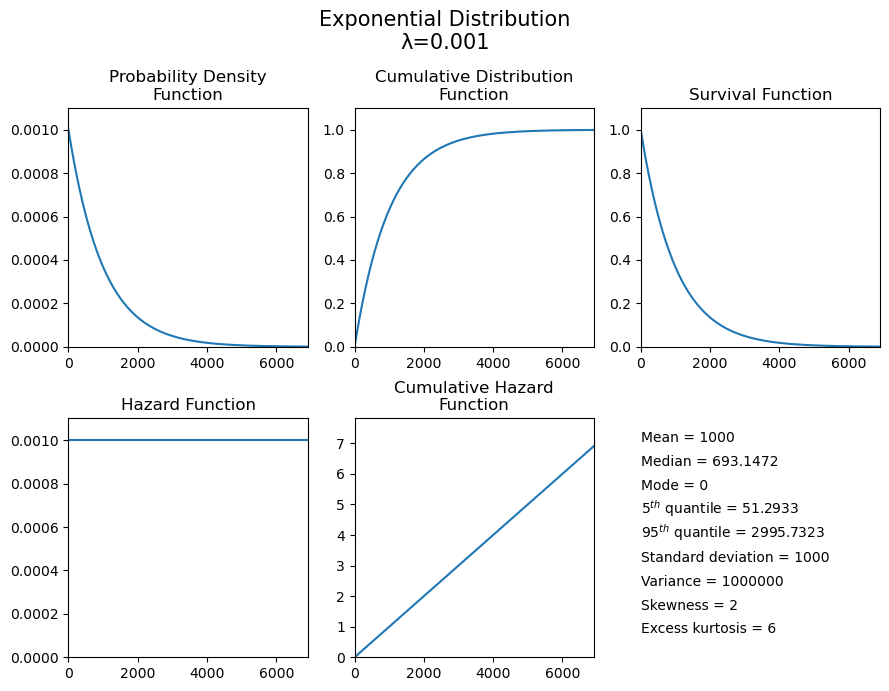

In [10]:
random_failures = Exponential_Distribution(Lambda=0.001)
random_failures.plot()

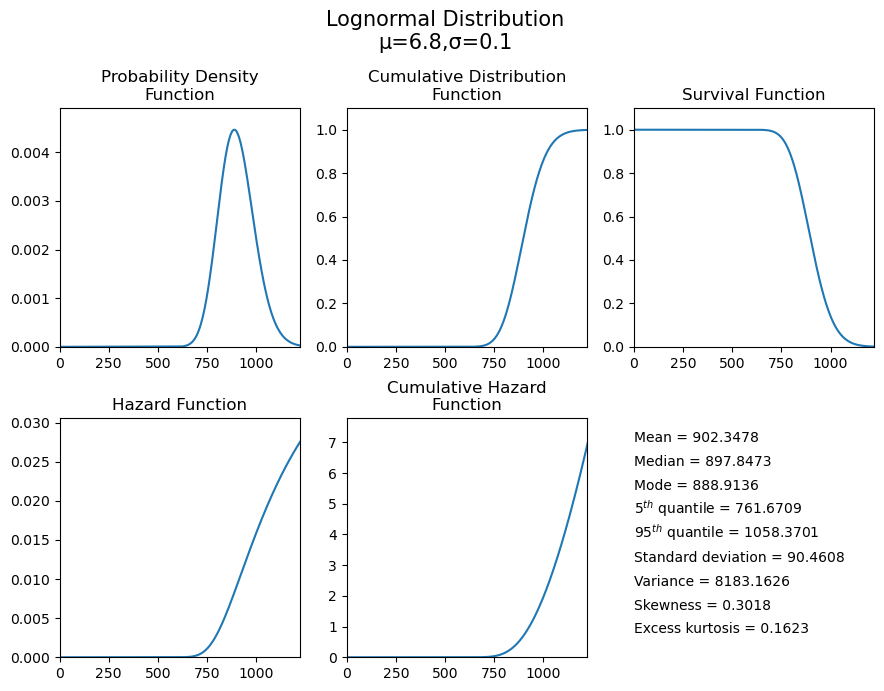

In [45]:
wear_out = Lognormal_Distribution(mu=6.8,sigma=0.1)
wear_out.plot()

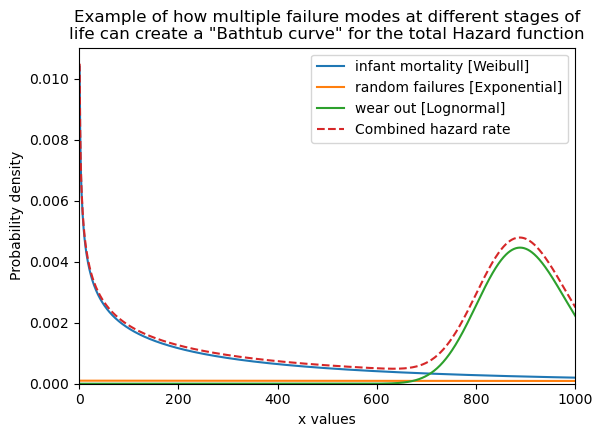

In [70]:

# import matplotlib.pyplot as plt
# import numpy as np
xvals = np.linspace(0,1200,1200)
infant_mortality = Weibull_Distribution(alpha=400,beta=0.7).PDF(xvals=xvals,label='infant mortality [Weibull]')
random_failures = Exponential_Distribution(Lambda=0.0001).PDF(xvals=xvals,label='random failures [Exponential]')
wear_out = Lognormal_Distribution(mu=6.8,sigma=0.1).PDF(xvals=xvals,label='wear out [Lognormal]')
combined = infant_mortality + random_failures + wear_out
plt.plot(xvals,combined,linestyle='--',label='Combined hazard rate')
plt.legend()
plt.title('Example of how multiple failure modes at different stages of\nlife can create a "Bathtub curve" for the total Hazard function')
plt.xlim(0,1000)
plt.ylim(bottom=0)
plt.show()